In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [ ]:
!ls

sample_data  spark-3.3.1-bin-hadoop3.tgz


In [ ]:
!tar xvf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

spark-3.3.1-bin-hadoop3/
spark-3.3.1-bin-hadoop3/LICENSE
spark-3.3.1-bin-hadoop3/NOTICE
spark-3.3.1-bin-hadoop3/R/
spark-3.3.1-bin-hadoop3/R/lib/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.1-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.1-bin-hadoop3/R/lib/Spar

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.3.1-bin-hadoop3'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
## standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Chicago_Crimes_2012_to_2017.csv to Chicago_Crimes_2012_to_2017.csv


In [ ]:
df = spark.read.csv('Chicago_Crimes_2012_to_2017.csv', inferSchema=True, header=True)

In [ ]:
df =df.cache()

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- Community Area: double (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
print(df.count(),len(df.columns))

1456714 23


In [ ]:
df.show(n=3, truncate=False)

+---+--------+-----------+----------------------+-------------------+----+----------------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|_c0|ID      |Case Number|Date                  |Block              |IUCR|Primary Type          |Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+---+--------+-----------+----------------------+-------------------+----+----------------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|3  |10508693|HZ250496   |05/03/2016 11:40:00 PM|013XX S SAWY

In [ ]:
# crime types
crime_types = df.groupBy('Primary Type').count()

In [ ]:
crime_type_count = crime_types.orderBy('count', ascending=False)

In [ ]:
df.count()

1456714

In [ ]:
df.columns

['_c0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
# Frequency of crimes grouped by their primary type
crime_type_count.show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|               THEFT|329460|
|             BATTERY|263700|
|     CRIMINAL DAMAGE|155455|
|           NARCOTICS|135240|
|             ASSAULT| 91289|
|       OTHER OFFENSE| 87874|
|            BURGLARY| 83397|
|  DECEPTIVE PRACTICE| 75495|
| MOTOR VEHICLE THEFT| 61138|
|             ROBBERY| 57313|
|   CRIMINAL TRESPASS| 36912|
|   WEAPONS VIOLATION| 17233|
|PUBLIC PEACE VIOL...| 13122|
|OFFENSE INVOLVING...| 11398|
|        PROSTITUTION|  7633|
| CRIM SEXUAL ASSAULT|  6823|
|INTERFERENCE WITH...|  6195|
|         SEX OFFENSE|  4885|
|            HOMICIDE|  2649|
|               ARSON|  2217|
+--------------------+------+
only showing top 20 rows



In [ ]:
# crimegrouped by thte location description finding the most vulnerable areas of the Chicago city
loc_group = df.groupBy('Location Description').count()
loc_crimecount = loc_group.orderBy('count', ascending=False)
loc_crimecount.show()

+--------------------+------+
|Location Description| count|
+--------------------+------+
|              STREET|330471|
|           RESIDENCE|233530|
|           APARTMENT|185023|
|            SIDEWALK|160891|
|               OTHER| 55774|
|PARKING LOT/GARAG...| 41768|
|               ALLEY| 31771|
|RESIDENTIAL YARD ...| 30645|
|  SMALL RETAIL STORE| 28803|
|SCHOOL, PUBLIC, B...| 25959|
|          RESTAURANT| 25872|
|    RESIDENCE-GARAGE| 25720|
|RESIDENCE PORCH/H...| 25511|
|VEHICLE NON-COMME...| 25104|
|    DEPARTMENT STORE| 20709|
|  GROCERY FOOD STORE| 15999|
|         GAS STATION| 15387|
|       PARK PROPERTY| 12270|
|       BAR OR TAVERN|  9871|
|COMMERCIAL / BUSI...|  7705|
+--------------------+------+
only showing top 20 rows



In [ ]:
crimecount_df = pd.DataFrame(crime_type_count.rdd.map(lambda l: l.asDict()).collect())
crimecount_df.head(10)

,Primary Type,count
0,THEFT,329460
1,BATTERY,263700
2,CRIMINAL DAMAGE,155455
3,NARCOTICS,135240
4,ASSAULT,91289
5,OTHER OFFENSE,87874
6,BURGLARY,83397
7,DECEPTIVE PRACTICE,75495
8,MOTOR VEHICLE THEFT,61138
9,ROBBERY,57313


[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

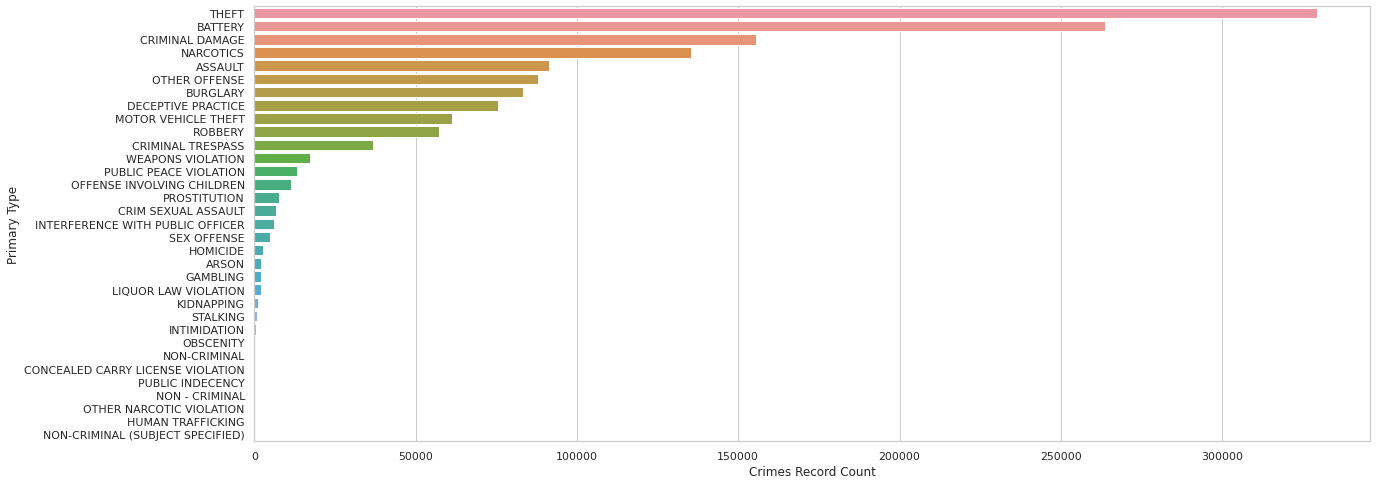

In [ ]:
plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='Primary Type', data=crimecount_df)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

In [ ]:
crimecount_df = pd.DataFrame(loc_group.rdd.map(lambda l: l.asDict()).collect())
crimecount_df = crimecount_df.loc[crimecount_df['count'] >4000]
crimecount_df.shape

(33, 2)

[Text(0, 0.5, 'Location Description'), Text(0.5, 0, 'Crimes Record Count')]

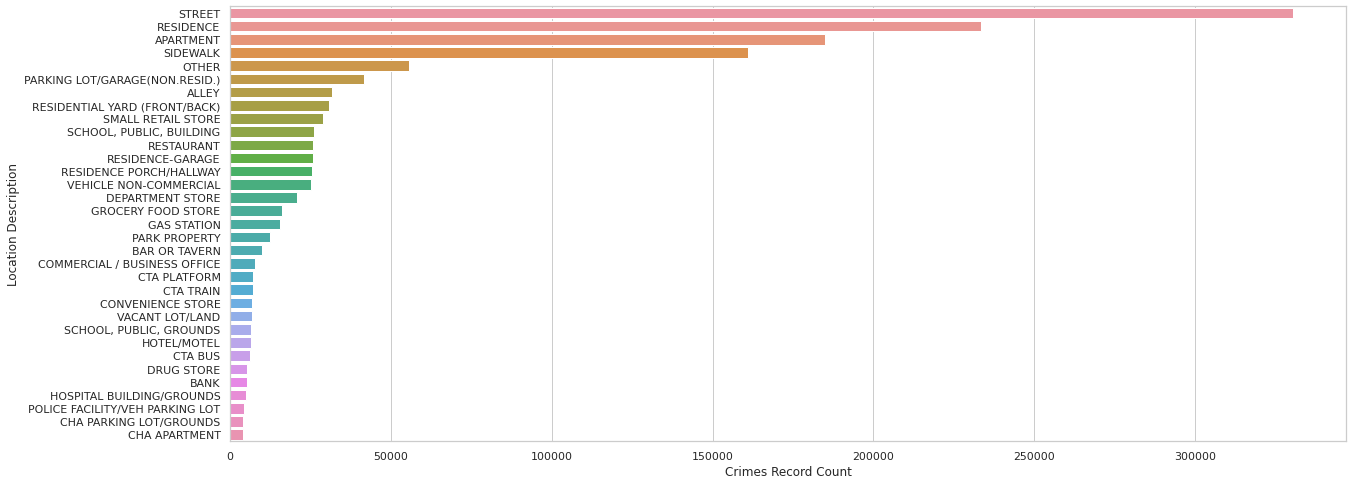

In [ ]:
plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='Location Description', data=crimecount_df.sort_values('count', ascending=False))
type_graph.set(ylabel="Location Description", xlabel="Crimes Record Count")

In [ ]:
import datetime
from pyspark.sql.functions import *

In [ ]:
df.select(min('date').alias('first_record_date'), max('date').alias('latest_record_date')).show(truncate=False)

+----------------------+----------------------+
|first_record_date     |latest_record_date    |
+----------------------+----------------------+
|01/01/2012 01:00:00 AM|12/31/2016 12:56:00 AM|
+----------------------+----------------------+



In [ ]:
df = df.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY')) #adding a month column to be able to view stats on a monthly basis

In [ ]:
df.select(['date','date_time', 'month'])\
  .show(n=2, truncate=False)

+----------------------+-------------------+----------+
|date                  |date_time          |month     |
+----------------------+-------------------+----------+
|05/03/2016 11:40:00 PM|2016-05-03 23:40:00|2016-01-01|
|05/03/2016 09:40:00 PM|2016-05-03 21:40:00|2016-01-01|
+----------------------+-------------------+----------+
only showing top 2 rows



In [ ]:
# crime types and arrest over years:
type_arrest_date = df.groupBy(['Arrest', 'month'])\
                     .count()\
                     .orderBy(['count'], ascending=[True, False])
print()
type_arrest_date.show(3, truncate=False)


+------+----------+-----+
|Arrest|month     |count|
+------+----------+-----+
|true  |2017-01-01|1902 |
|false |2017-01-01|9455 |
|true  |2016-01-01|50386|
+------+----------+-----+
only showing top 3 rows



In [ ]:
# A pandas data frame of the collected dictionary version of the date-grouped DF above
type_arrest_pddf = pd.DataFrame(type_arrest_date.rdd.map(lambda l: l.asDict()).collect())

In [ ]:
print(df.filter(col('Arrest') == True).count())

377472


In [ ]:
print(df.filter(col('Arrest') == False).count())

1079242


In [ ]:
print(df.filter(col('Arrest') != True).filter(col('Arrest') != False).count())

0


In [ ]:
type_arrest_pddf['Arrest'] = type_arrest_pddf['Arrest'].apply(lambda l: l==True)
type_arrest_pddf.head(5)

,Arrest,month,count
0,True,2017-01-01,1902
1,False,2017-01-01,9455
2,True,2016-01-01,50386
3,True,2015-01-01,69397
4,True,2014-01-01,79057


In [ ]:
type_arrest_pddf['Arrest'].value_counts()

True     6
False    6
Name: Arrest, dtype: int64

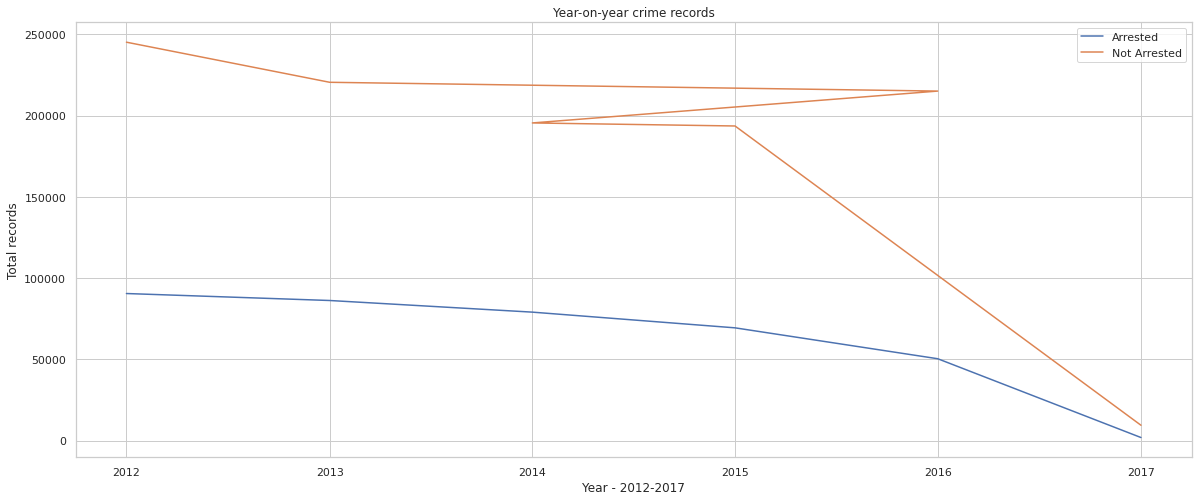

In [ ]:
# Data for plotting
t = type_arrest_pddf['count'] - 20 # np.arange(0.0, 2.0, 0.01)
s = type_arrest_pddf['month']

arrested = type_arrest_pddf[type_arrest_pddf['Arrest'] == True]
not_arrested = type_arrest_pddf[type_arrest_pddf['Arrest'] == False]

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(arrested['month'], arrested['count'], label='Arrested')
ax.plot(not_arrested['month'], not_arrested['count'], label='Not Arrested')

ax.set(xlabel='Year - 2012-2017', ylabel='Total records',
       title='Year-on-year crime records')
ax.grid(b=True, which='both', axis='y')
ax.legend()

In [ ]:
# Extract the "hour" field from the date into a separate column called "hour"
df_hour = df.withColumn('hour', hour(df['date_time']))

In [ ]:
# Derive a data frame with crime counts per hour of the day:
hourly_count = df_hour.groupBy(['Primary Type', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')

In [ ]:
hourly_crimecount_df = pd.DataFrame(hourly_total_count.select(hourly_total_count['hour'], hourly_total_count['sum(count)'].alias('count'))\
                                .rdd.map(lambda l: l.asDict())\
                                 .collect())

In [ ]:
hourly_crimecount_df = hourly_crimecount_df.sort_values(by='hour')

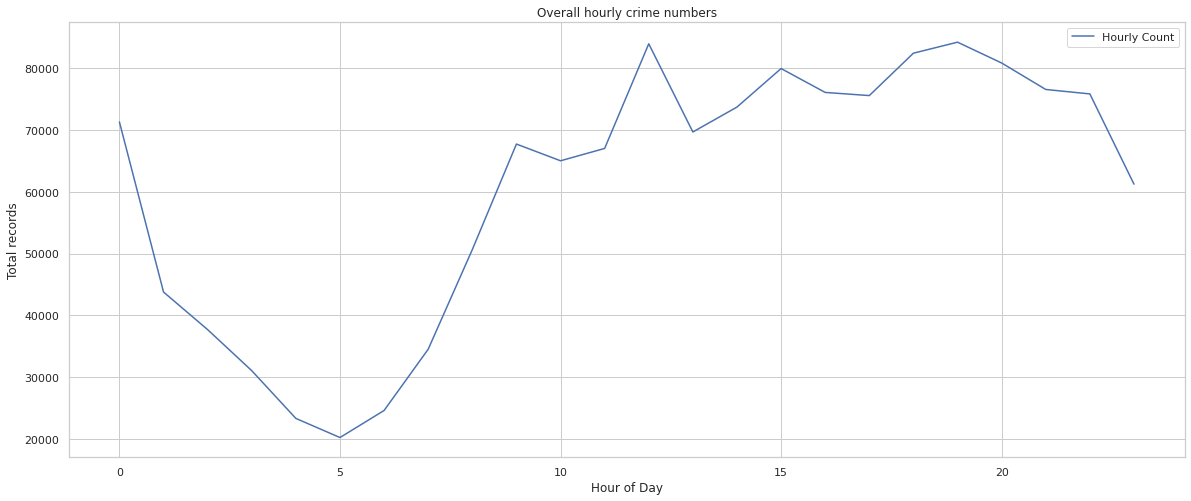

In [ ]:
fig, ax = plt.subplots()
ax.plot(hourly_crimecount_df['hour'], hourly_crimecount_df['count'], label='Hourly Count')

ax.set(xlabel='Hour of Day', ylabel='Total records',
       title='Overall hourly crime numbers')
ax.grid(b=True, which='both', axis='y')
ax.legend()

Types of locations with crime entries

In [ ]:
# Number of types of location recorded in the dataset
df.select('Location Description').distinct().count()

143

In [ ]:
df.groupBy(['Location Description']).count().orderBy('count', ascending=False).show(10)

+--------------------+------+
|Location Description| count|
+--------------------+------+
|              STREET|330471|
|           RESIDENCE|233530|
|           APARTMENT|185023|
|            SIDEWALK|160891|
|               OTHER| 55774|
|PARKING LOT/GARAG...| 41768|
|               ALLEY| 31771|
|RESIDENTIAL YARD ...| 30645|
|  SMALL RETAIL STORE| 28803|
|SCHOOL, PUBLIC, B...| 25959|
+--------------------+------+
only showing top 10 rows



Domestic Crimes

In [ ]:
domestic_hour = pd.DataFrame(df_hour.groupBy(['domestic', 'hour']).count().orderBy('hour').rdd.map(lambda row: row.asDict()).collect())

In [ ]:
domestic_hour.head()

,domestic,hour,count
0,True,0,11856
1,False,0,59432
2,True,1,9345
3,False,1,34426
4,True,2,8236


In [ ]:
dom = domestic_hour[domestic_hour['domestic'] == True]['count']
non_dom = domestic_hour[domestic_hour['domestic'] == False]['count']

either_dom = domestic_hour.groupby(by=['hour']).sum()['count']

dom_keys = domestic_hour[domestic_hour['domestic'] == False]['hour']

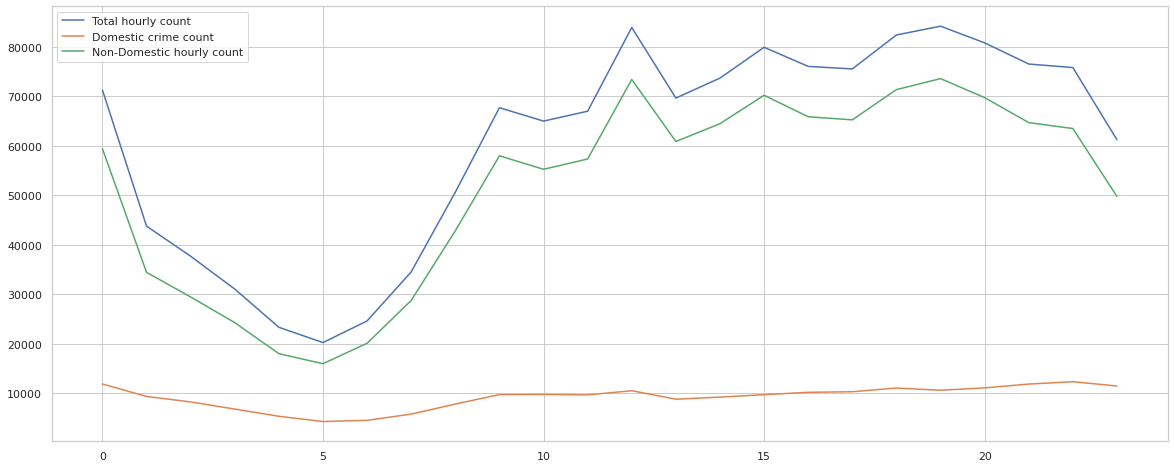

In [ ]:
figure, axes = plt.subplots()

axes.plot(dom_keys, either_dom, label='Total hourly count')
axes.plot(dom_keys, dom, label='Domestic crime count')
axes.plot(dom_keys, non_dom, label='Non-Domestic hourly count')

axes.legend()

In [ ]:
df_dates = df_hour.withColumn('week_day', dayofweek(df_hour['date_time']))\
                 .withColumn('year_month', month(df_hour['date_time']))\
                 .withColumn('month_day', dayofmonth(df_hour['date_time']))\
                 .withColumn('date_number', datediff(df['date_time'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

In [ ]:
df_dates.select(['date', 'month', 'hour', 'week_day', 'year', 'year_month', 'month_day', 'date_number']).show(20, truncate=False)

+----------------------+----------+----+--------+----+----------+---------+-----------+
|date                  |month     |hour|week_day|year|year_month|month_day|date_number|
+----------------------+----------+----+--------+----+----------+---------+-----------+
|05/03/2016 11:40:00 PM|2016-01-01|23  |3       |2016|5         |3        |5601       |
|05/03/2016 09:40:00 PM|2016-01-01|21  |3       |2016|5         |3        |5601       |
|05/03/2016 11:31:00 PM|2016-01-01|23  |3       |2016|5         |3        |5601       |
|05/03/2016 10:10:00 PM|2016-01-01|22  |3       |2016|5         |3        |5601       |
|05/03/2016 10:00:00 PM|2016-01-01|22  |3       |2016|5         |3        |5601       |
|05/03/2016 10:35:00 PM|2016-01-01|22  |3       |2016|5         |3        |5601       |
|05/03/2016 10:30:00 PM|2016-01-01|22  |3       |2016|5         |3        |5601       |
|05/03/2016 09:30:00 PM|2016-01-01|21  |3       |2016|5         |3        |5601       |
|05/03/2016 04:00:00 PM|2016-01-

Crime levels based on day of the week

In [ ]:
week_day_crime_counts = df_dates.groupBy('week_day').count()

In [ ]:
week_day_crime_crimecount_df = pd.DataFrame(week_day_crime_counts.orderBy('week_day').rdd.map(lambda e: e.asDict()).collect())

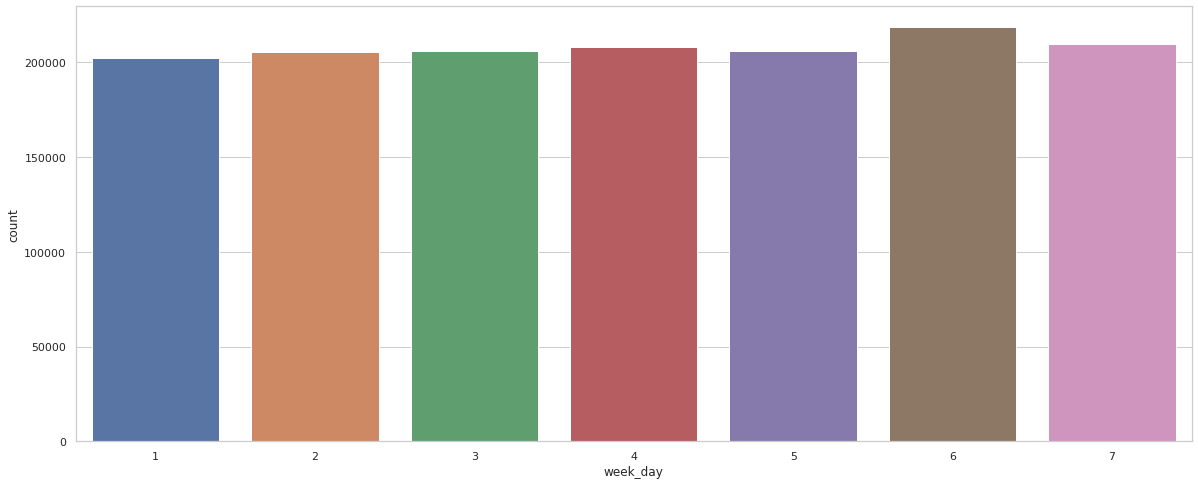

In [ ]:
sns.barplot(data=week_day_crime_crimecount_df, x='week_day', y='count')

Month of year

In [ ]:
year_month_crime_counts = df_dates.groupBy('year_month').count()

In [ ]:
year_month_crime_crimecount_df = pd.DataFrame(year_month_crime_counts.orderBy('year_month').rdd.map(lambda e: e.asDict()).collect())


In [ ]:
year_month_crime_crimecount_df

,year_month,count
0,1,123809
1,2,98073
2,3,119010
3,4,118064
4,5,129735
5,6,130575
6,7,135762
7,8,133738
8,9,124067
9,10,123571


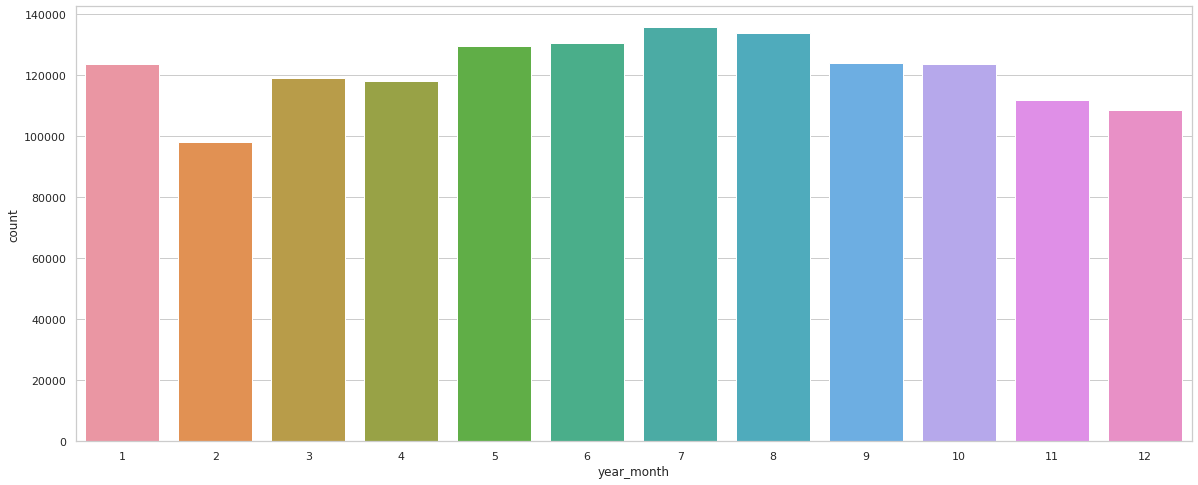

In [ ]:
sns.barplot(data=year_month_crime_crimecount_df, y='count', x='year_month')

Day of month

In [ ]:
month_day_crime_counts = df_dates.groupBy('month_day').count()

In [ ]:
month_day_crime_crimecount_df = pd.DataFrame(month_day_crime_counts.orderBy('month_day').rdd.map(lambda e: e.asDict()).collect())

Top 10 worst days of the month

In [ ]:
month_day_crime_crimecount_df.sort_values(by='count', ascending=False).head(10)

,month_day,count
0,1,57644
14,15,50041
16,17,48681
15,16,48285
13,14,48201
19,20,48193
17,18,48003
6,7,47937
2,3,47883
12,13,47591


In [ ]:
month_day_crime_crimecount_df = month_day_crime_crimecount_df.sort_values(by='month_day', ascending=True)

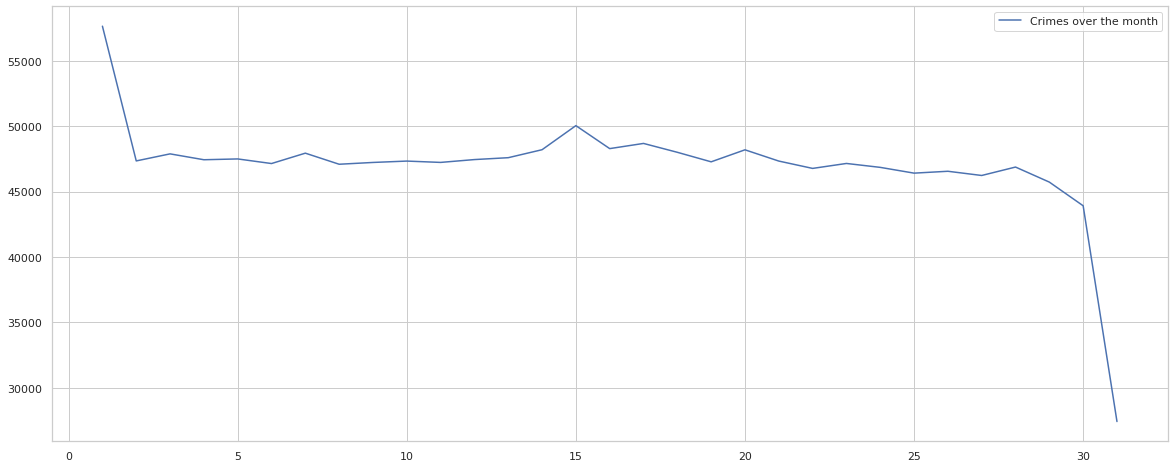

In [ ]:
fg, ax = plt.subplots()

ax.plot(month_day_crime_crimecount_df['month_day'], month_day_crime_crimecount_df['count'], label='Crimes over the month')

ax.grid(b=True, which='both')
ax.legend()

Chicago has 77 community areas. How do they appear next to one another in a count plot?

In [ ]:
df_dates_community_areas = df_dates.na.drop(subset=['Community Area']).groupBy('Community Area').count()

In [ ]:
df_dates_community_areas.orderBy('count', ascending=False).show(10)

+--------------+-----+
|Community Area|count|
+--------------+-----+
|          25.0|94730|
|           8.0|50290|
|          43.0|48909|
|          23.0|47093|
|          29.0|46151|
|          28.0|43501|
|          71.0|41634|
|          67.0|41281|
|          24.0|40832|
|          32.0|39696|
+--------------+-----+
only showing top 10 rows



In [ ]:
## Is it possible to see how the top crime types occur in the top crime-affected areas?
top_crime_types = df_dates.select('Primary Type').groupBy('Primary Type').count().rdd.map(lambda row: row.asDict()).takeOrdered(10, key=lambda l: 1/l['count'])
top_busy_areas =  df_dates_community_areas.rdd.map(lambda row: row.asDict()).takeOrdered(10, key=lambda l: 1/l['count'])

In [ ]:
top_crime_types_lst = [dc['Primary Type'] for dc in top_crime_types]
top_busy_areas_lst = [str(dc['Community Area']) for dc in top_busy_areas]

In [ ]:
top_crime_types_lst

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'NARCOTICS',
 'ASSAULT',
 'OTHER OFFENSE',
 'BURGLARY',
 'DECEPTIVE PRACTICE',
 'MOTOR VEHICLE THEFT',
 'ROBBERY']

In [ ]:
top_busy_areas_lst

['25.0', '8.0', '43.0', '23.0', '29.0', '28.0', '71.0', '67.0', '24.0', '32.0']

In [ ]:
q1 = "instr('" + ' '.join(top_busy_areas_lst) + "', 'Community Area') > 0"
q2 = "instr('" + ' '.join(top_crime_types_lst) + "', 'Primary Type') > 0"
print(q1)

instr('25.0 8.0 43.0 23.0 29.0 28.0 71.0 67.0 24.0 32.0', 'Community Area') > 0


In [ ]:
## Construct a data frame filtered on these top community areas and top crime types:
df_dates_tops = df_dates.filter(q1).filter(q2)

In [ ]:
df_dates_tops.count()

0

In [ ]:
tops_of_tops = df_dates_tops.groupBy(['Primary Type', 'Community Area']).count().orderBy(['Primary Type', 'count', 'Community Area'], ascending=[True, False, True]).cache()


In [ ]:
tops_of_tops.show(20)

+------------+--------------+-----+
|Primary Type|Community Area|count|
+------------+--------------+-----+
+------------+--------------+-----+



Community area names
Let's link names of these community areas. These float numbers are having a hard time making any sense...

In [ ]:
area_names = """
01	Rogers Park	
40	Washington Park
02	West Ridge	
41	Hyde Park
03	Uptown	
42	Woodlawn
04	Lincoln Square	
43	South Shore
05	North Center	
44	Chatham
06	Lakeview	
45	Avalon Park
07	Lincoln Park	
46	South Chicago
08	Near North Side	
47	Burnside
09	Edison Park	
48	Calumet Heights
10	Norwood Park	
49	Roseland
11	Jefferson Park	
50	Pullman
12	Forest Glen	
51	South Deering
13	North Park	
52	East Side
14	Albany Park	
53	West Pullman
15	Portage Park	
54	Riverdale
16	Irving Park	
55	Hegewisch
17	Dunning	
56	Garfield Ridge
18	Montclare	
57	Archer Heights
19	Belmont Cragin	
58	Brighton Park
20	Hermosa	
59	McKinley Park
21	Avondale	
60	Bridgeport
22	Logan Square	
61	New City
23	Humboldt Park	
62	West Elsdon
24	West Town	
63	Gage Park
25	Austin	
64	Clearing
26	West Garfield Park 	
65	West Lawn
27	East Garfield Park	
66	Chicago Lawn
28	Near West Side	
67	West Englewood
29	North Lawndale	
68	Englewood
30	South Lawndale	
69	Greater Grand Crossing
31	Lower West Side	
70	Ashburn
32	Loop	
71	Auburn Gresham	
33	Near South Side	
72	Beverly
34	Armour Square	
73	Washington Heights
35	Douglas	
74	Mount Greenwood
36	Oakland	
75	Morgan Park
37	Fuller Park	
76	O'Hare
38	Grand Boulevard	
77	Edgewater
39	Kenwood	
"""

In [ ]:
code_pairs = [[float(p[0]), p[1]] for p in [pair.strip().split('\t') for pair in area_names.strip().split('\n')]]

In [ ]:
code_pairs[:5]

[[1.0, 'Rogers Park'],
 [40.0, 'Washington Park'],
 [2.0, 'West Ridge'],
 [41.0, 'Hyde Park'],
 [3.0, 'Uptown']]

A view of crime count per community area

In [ ]:
community_area_counts = pd.DataFrame(df_dates_community_areas.rdd.map(lambda row: row.asDict()).collect())

In [ ]:
# Create a dictionary of area code to names
area_name_dic = {float(k[0]):k[1] for k in code_pairs}

In [ ]:
community_area_counts['community_area_name'] = community_area_counts['Community Area'].apply(lambda area: area_name_dic.get(float(area),  'unknown_%s'%area))

In [ ]:
community_area_counts = community_area_counts.sort_values(by='count')
community_area_counts.head(5)

,Community Area,count,community_area_name
4,0.0,13,unknown_0.0
71,9.0,1433,Edison Park
10,47.0,2197,Burnside
74,12.0,2543,Forest Glen
69,55.0,3209,Hegewisch


In [ ]:
code_pairs_df = spark.createDataFrame(code_pairs, ['Community Area', 'Area Name'])

In [ ]:
named_tops_of_tops = code_pairs_df.join(tops_of_tops, on='Community Area', how='right')

In [ ]:
named_tops_of_tops.show(10)

+--------------+---------+------------+-----+
|Community Area|Area Name|Primary Type|count|
+--------------+---------+------------+-----+
+--------------+---------+------------+-----+



In [ ]:
selected_features = [
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'hour',
 'week_day',
 'year_month',
 'month_day',
 'date_number']

In [ ]:
#Let's see the schema of these selected features:
features_df = df_dates.select(selected_features)
features_df.printSchema()

root
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- Community Area: double (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- week_day: integer (nullable = true)
 |-- year_month: integer (nullable = true)
 |-- month_day: integer (nullable = true)
 |-- date_number: integer (nullable = true)



In [ ]:
feature_level_count_dic = []

for feature in selected_features:
    print('Analysing %s' % feature)
    levels_list_df = features_df.select(feature).distinct()
    feature_level_count_dic.append({'feature': feature, 'level_count': levels_list_df.count()})

Analysing Location Description
Analysing Arrest
Analysing Domestic
Analysing Beat
Analysing District
Analysing Ward
Analysing Community Area
Analysing FBI Code
Analysing hour
Analysing week_day
Analysing year_month
Analysing month_day
Analysing date_number


In [ ]:
pd.DataFrame(feature_level_count_dic).sort_values(by='level_count', ascending=False)

,feature,level_count
12,date_number,1845
3,Beat,302
0,Location Description,143
6,Community Area,79
5,Ward,51
11,month_day,31
7,FBI Code,26
4,District,25
8,hour,24
10,year_month,12


Preparing Model

In [ ]:
from pyspark.sql.types import StructField, StructType, StringType, LongType

Using the Spark's string indexer to index selected feautres

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
df_dates_features = df_dates.na.drop(subset=selected_features)

In [ ]:
df_dates_features = df_dates_features.withColumn("Arrest", col("Arrest").cast("String"))
df_dates_features = df_dates_features.withColumn("Domestic", col("Domestic").cast("String"))

In [ ]:
df_dates_features.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- Community Area: double (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- date_time: timestamp (nullable = true)
 |-- month: date (nullab

In [ ]:
for feature in feature_level_count_dic:
    indexer = StringIndexer(inputCol=feature['feature'], outputCol='%s_indexed' % feature['feature'])
    print('Fitting feature "%s"' % feature['feature'])
    model = indexer.fit(df_dates_features)
    print('Transforming "%s"' % feature['feature'])
    df_dates_features = model.transform(df_dates_features)

Fitting feature "Location Description"
Transforming "Location Description"
Fitting feature "Arrest"
Transforming "Arrest"
Fitting feature "Domestic"
Transforming "Domestic"
Fitting feature "Beat"
Transforming "Beat"
Fitting feature "District"
Transforming "District"
Fitting feature "Ward"
Transforming "Ward"
Fitting feature "Community Area"
Transforming "Community Area"
Fitting feature "FBI Code"
Transforming "FBI Code"
Fitting feature "hour"
Transforming "hour"
Fitting feature "week_day"
Transforming "week_day"
Fitting feature "year_month"
Transforming "year_month"
Fitting feature "month_day"
Transforming "month_day"
Fitting feature "date_number"
Transforming "date_number"


In [ ]:
## String-index the response variable:
response_indexer = StringIndexer(inputCol='Primary Type', outputCol='primary_type_indexed')
response_model = response_indexer.fit(df_dates_features)
df_dates_featured = response_model.transform(df_dates_features)

In [ ]:
df_dates_featured.show(1)

+---+--------+-----------+--------------------+------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+----+--------+----------+---------+-----------+----------------------------+--------------+----------------+------------+----------------+------------+----------------------+----------------+------------+----------------+------------------+-----------------+-------------------+--------------------+
|_c0|      ID|Case Number|                Date|             Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|          date_time|     month|hour|week_day|year_month|month_day|date_number|Location Description_

In [ ]:
indexed_features = ['%s_indexed' % fc['feature'] for fc in feature_level_count_dic]
indexed_features

['Location Description_indexed',
 'Arrest_indexed',
 'Domestic_indexed',
 'Beat_indexed',
 'District_indexed',
 'Ward_indexed',
 'Community Area_indexed',
 'FBI Code_indexed',
 'hour_indexed',
 'week_day_indexed',
 'year_month_indexed',
 'month_day_indexed',
 'date_number_indexed']

In [ ]:
assembler = VectorAssembler(inputCols=indexed_features, outputCol='features')
vectorized_df_dates = assembler.transform(df_dates_featured)

In [ ]:
vectorized_df_dates.select('features').take(1)

[Row(features=DenseVector([2.0, 1.0, 1.0, 83.0, 9.0, 2.0, 4.0, 1.0, 15.0, 3.0, 3.0, 8.0, 1280.0]))]

Now let's train the model.
We're using 70% to 30% split between the train and the test datasets

Let's try to train a logistic regression.

In [ ]:
train, test = vectorized_df_dates.randomSplit([0.7, 0.3])

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
logisticRegression = LogisticRegression(labelCol='primary_type_indexed', featuresCol='features', maxIter=10, family='multinomial')

In [ ]:
fittedModel = logisticRegression.fit(train)

Model performance:

In [ ]:
fittedModel.summary.accuracy

0.6076046494034981

In [ ]:
model_summary = fittedModel.summary

In [ ]:
fittedModel.coefficientMatrix

DenseMatrix(33, 13, [-0.0036, -1.2798, 0.1704, 0.0006, 0.0093, 0.003, -0.0009, -3.2931, ..., 0.0, 0.0001, -0.0001, 0.0, 0.0003, 0.0003, 0.0, 0.0], 1)

Why the 33X13 shape?
That's because the multinomial logistic regression is fitted on each class of the label. It computes the probability of each class and then predicts based on these probabilities.

In [ ]:
print(fittedModel.coefficientMatrix)

DenseMatrix([[-3.63548213e-03, -1.27981586e+00,  1.70441450e-01,
               5.89423655e-04,  9.31440537e-03,  2.98685452e-03,
              -8.77926346e-04, -3.29312937e+00, -2.85782550e-03,
              -4.05579505e-03, -6.74714075e-03,  7.95812125e-04,
               8.17531094e-05],
             [ 2.25025829e-03, -6.87267059e-01,  3.65573321e+00,
               4.66586985e-04,  6.42536883e-03, -1.34780286e-03,
              -1.67967370e-03, -7.12380558e-01,  1.68116875e-02,
               3.44956090e-02, -1.06939074e-02,  2.70156970e-03,
               7.69854863e-05],
             [-1.88665531e-02, -2.20068751e+00,  6.63991179e-01,
              -1.10671454e-03, -3.12592145e-02, -2.59838781e-04,
              -1.74130551e-03, -1.08673929e+00,  2.57606336e-02,
               1.33034505e-02, -7.78863396e-03,  2.82646411e-03,
               9.47651133e-05],
             [-2.89082655e-02,  8.15198137e+00, -3.32524467e+00,
              -1.01461220e-03, -2.82234566e-02, -1.03920231

In [ ]:
print('Coefficient matrix:\nRow count = %s\nCol count = %s' % (fittedModel.coefficientMatrix.numRows, fittedModel.coefficientMatrix.numCols))

Coefficient matrix:
Row count = 33
Col count = 13


In [ ]:
print('Model:\nNum Classes = %s\nNum Features = %s' % (fittedModel.numClasses, fittedModel.numFeatures))

Model:
Num Classes = 33
Num Features = 13


In [ ]:
print('Training "Primary Type" factor level count = %s' % train.select('primary_type_indexed').distinct().count())

Training "Primary Type" factor level count = 33


In [ ]:
vectorized_df_dates.select('features').show(2, truncate=False)

+-----------------------------------------------------------+
|features                                                   |
+-----------------------------------------------------------+
|[2.0,1.0,1.0,83.0,9.0,2.0,4.0,1.0,15.0,3.0,3.0,8.0,1280.0] |
|[1.0,0.0,1.0,127.0,6.0,7.0,24.0,1.0,5.0,3.0,3.0,8.0,1280.0]|
+-----------------------------------------------------------+
only showing top 2 rows



In [ ]:
fittedModel.numClasses

33

In [ ]:
fittedModel.numFeatures

13

In [ ]:
train.select('primary_type_indexed').distinct().count()

33

In [ ]:
df_dates.select('Primary Type').distinct().count()

33

In [ ]:
fittedModel.interceptVector.values.size

33

In [ ]:
print(model_summary.objectiveHistory)
print()
print('Objective history size ', len(model_summary.objectiveHistory))

[2.4024456454073184, 2.0954992355355415, 1.8257035773357126, 1.6707457700430706, 1.5761945864743878, 1.4856183007622852, 1.4242461154306798, 1.3860908779164869, 1.3681299160948213, 1.3358691328638046, 1.3096040173194616]

Objective history size  11


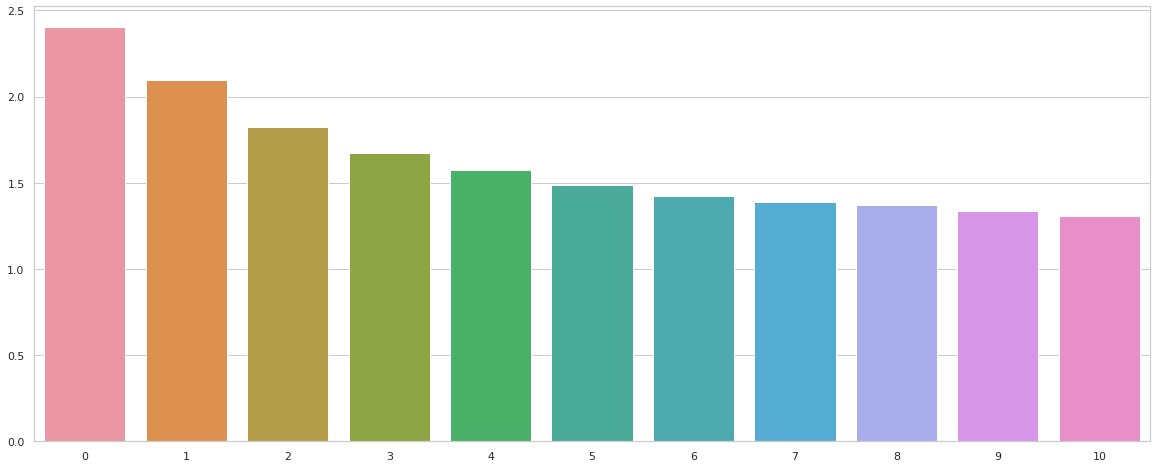

In [ ]:
sns.barplot(y=model_summary.objectiveHistory, x=list(range(len(model_summary.objectiveHistory))))

In [ ]:
label_stats = {float(i):{'index': float(i)} for i in range(34)}
print(label_stats)

{0.0: {'index': 0.0}, 1.0: {'index': 1.0}, 2.0: {'index': 2.0}, 3.0: {'index': 3.0}, 4.0: {'index': 4.0}, 5.0: {'index': 5.0}, 6.0: {'index': 6.0}, 7.0: {'index': 7.0}, 8.0: {'index': 8.0}, 9.0: {'index': 9.0}, 10.0: {'index': 10.0}, 11.0: {'index': 11.0}, 12.0: {'index': 12.0}, 13.0: {'index': 13.0}, 14.0: {'index': 14.0}, 15.0: {'index': 15.0}, 16.0: {'index': 16.0}, 17.0: {'index': 17.0}, 18.0: {'index': 18.0}, 19.0: {'index': 19.0}, 20.0: {'index': 20.0}, 21.0: {'index': 21.0}, 22.0: {'index': 22.0}, 23.0: {'index': 23.0}, 24.0: {'index': 24.0}, 25.0: {'index': 25.0}, 26.0: {'index': 26.0}, 27.0: {'index': 27.0}, 28.0: {'index': 28.0}, 29.0: {'index': 29.0}, 30.0: {'index': 30.0}, 31.0: {'index': 31.0}, 32.0: {'index': 32.0}, 33.0: {'index': 33.0}}


In [ ]:
print("False positive rate by label:")
for i, rate in enumerate(model_summary.falsePositiveRateByLabel):
    label_stats[i]['false_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.truePositiveRateByLabel):
    label_stats[i]['true_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.precisionByLabel):
    label_stats[i]['precision_rate'] = rate
    
for i, rate in enumerate(model_summary.recallByLabel):
    label_stats[i]['recall_rate'] = rate
    
for i, rate in enumerate(model_summary.fMeasureByLabel()):
    label_stats[i]['f_measure'] = rate

False positive rate by label:


In [ ]:
train_rdd = train.select(['Primary Type', 'primary_type_indexed']).distinct().orderBy('primary_type_indexed').rdd.map(lambda l: l.asDict()).collect()

In [ ]:
for l in train_rdd:
    print(l)
    label_stats[l['primary_type_indexed']]['Primary Type'] = l['Primary Type']

{'Primary Type': 'THEFT', 'primary_type_indexed': 0.0}
{'Primary Type': 'BATTERY', 'primary_type_indexed': 1.0}
{'Primary Type': 'CRIMINAL DAMAGE', 'primary_type_indexed': 2.0}
{'Primary Type': 'NARCOTICS', 'primary_type_indexed': 3.0}
{'Primary Type': 'ASSAULT', 'primary_type_indexed': 4.0}
{'Primary Type': 'OTHER OFFENSE', 'primary_type_indexed': 5.0}
{'Primary Type': 'BURGLARY', 'primary_type_indexed': 6.0}
{'Primary Type': 'DECEPTIVE PRACTICE', 'primary_type_indexed': 7.0}
{'Primary Type': 'MOTOR VEHICLE THEFT', 'primary_type_indexed': 8.0}
{'Primary Type': 'ROBBERY', 'primary_type_indexed': 9.0}
{'Primary Type': 'CRIMINAL TRESPASS', 'primary_type_indexed': 10.0}
{'Primary Type': 'WEAPONS VIOLATION', 'primary_type_indexed': 11.0}
{'Primary Type': 'PUBLIC PEACE VIOLATION', 'primary_type_indexed': 12.0}
{'Primary Type': 'OFFENSE INVOLVING CHILDREN', 'primary_type_indexed': 13.0}
{'Primary Type': 'PROSTITUTION', 'primary_type_indexed': 14.0}
{'Primary Type': 'CRIM SEXUAL ASSAULT', 'pr

In [ ]:
rates_pddf = pd.DataFrame(list(label_stats.values()))

In [ ]:
rates_pddf = rates_pddf.sort_values(by='precision_rate', ascending=False)

In [ ]:
rates_pddf

,index,false_positive_rate,true_positive_rate,precision_rate,recall_rate,f_measure,Primary Type
0,0.0,0.036805,0.975234,0.885681,0.975234,0.928303,THEFT
6,6.0,0.025767,0.876244,0.673856,0.876244,0.761837,BURGLARY
13,13.0,0.001502,0.327784,0.631438,0.327784,0.431548,OFFENSE INVOLVING CHILDREN
3,3.0,0.067076,0.975140,0.598246,0.975140,0.741552,NARCOTICS
2,2.0,0.061963,0.771528,0.598201,0.771528,0.673898,CRIMINAL DAMAGE
1,1.0,0.094029,0.460428,0.520549,0.460428,0.488646,BATTERY
12,12.0,0.000006,0.000544,0.454545,0.000544,0.001088,PUBLIC PEACE VIOLATION
8,8.0,0.037710,0.688559,0.444448,0.688559,0.540206,MOTOR VEHICLE THEFT
10,10.0,0.002788,0.083581,0.439173,0.083581,0.140435,CRIMINAL TRESPASS
7,7.0,0.039466,0.396961,0.350955,0.396961,0.372543,DECEPTIVE PRACTICE


In [ ]:
test_data_pred = fittedModel.transform(test)

In [ ]:
test_data_pred

DataFrame[_c0: int, ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: int, District: double, Ward: double, Community Area: double, FBI Code: string, X Coordinate: double, Y Coordinate: double, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string, date_time: timestamp, month: date, hour: int, week_day: int, year_month: int, month_day: int, date_number: int, Location Description_indexed: double, Arrest_indexed: double, Domestic_indexed: double, Beat_indexed: double, District_indexed: double, Ward_indexed: double, Community Area_indexed: double, FBI Code_indexed: double, hour_indexed: double, week_day_indexed: double, year_month_indexed: double, month_day_indexed: double, date_number_indexed: double, primary_type_indexed: double, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [ ]:
test_data_pred[["primary_type_indexed", "features", "prediction"]].show()

+--------------------+--------------------+----------+
|primary_type_indexed|            features|prediction|
+--------------------+--------------------+----------+
|                 1.0|[2.0,1.0,1.0,83.0...|       1.0|
|                 1.0|[12.0,0.0,0.0,248...|       0.0|
|                 1.0|[3.0,0.0,0.0,186....|       0.0|
|                11.0|[13.0,1.0,0.0,115...|      11.0|
|                 0.0|[4.0,0.0,0.0,167....|       0.0|
|                 0.0|[0.0,0.0,0.0,124....|       0.0|
|                 1.0|[2.0,0.0,1.0,102....|       1.0|
|                 0.0|[0.0,0.0,0.0,259....|       0.0|
|                 7.0|[1.0,0.0,0.0,111....|       8.0|
|                 0.0|[0.0,0.0,0.0,37.0...|       0.0|
|                 0.0|[12.0,0.0,0.0,151...|       0.0|
|                 0.0|[0.0,0.0,0.0,140....|       0.0|
|                 0.0|[0.0,0.0,0.0,3.0,...|       0.0|
|                 0.0|[11.0,0.0,0.0,224...|       0.0|
|                 7.0|[1.0,0.0,0.0,116....|       6.0|
|         

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
regressionEvaluator = RegressionEvaluator(
predictionCol="prediction",
labelCol="primary_type_indexed",
metricName="rmse")
rmse = regressionEvaluator.evaluate(test_data_pred)
print(f"RMSE is {rmse:.1f}")

RMSE is 2.6


In [ ]:
r2 = regressionEvaluator.setMetricName("r2").evaluate(test_data_pred)
print(f"R2 is {r2}")

R2 is 0.564094872400299
